In [48]:
import matplotlib.pyplot as plt
from My_Key import Personal_Key
import requests

In [49]:
def get_data():
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BTC&apikey=" + Personal_Key
    response = requests.get(url)
    values = response.json()
    print(values)  # This will print the whole response from the API
    return values

# Get the data from the API
data = get_data()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'BTC', '3. Last Refreshed': '2025-01-30', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}, 'Time Series (Daily)': {'2025-01-30': {'1. open': '46.5200', '2. high': '47.2300', '3. low': '46.4312', '4. close': '46.5400', '5. volume': '729622'}, '2025-01-29': {'1. open': '45.2900', '2. high': '46.4897', '3. low': '44.9200', '4. close': '46.2300', '5. volume': '909442'}, '2025-01-28': {'1. open': '45.4700', '2. high': '45.9900', '3. low': '44.8300', '4. close': '44.8700', '5. volume': '752725'}, '2025-01-27': {'1. open': '44.6600', '2. high': '45.3400', '3. low': '43.7600', '4. close': '44.9200', '5. volume': '1749669'}, '2025-01-24': {'1. open': '46.7100', '2. high': '47.5600', '3. low': '46.4200', '4. close': '46.5100', '5. volume': '1109262'}, '2025-01-23': {'1. open': '45.4000', '2. high': '47.3900', '3. low': '45.3400', '4. close': '45.8100', '5. volume': '2903816'}, '2025-01-2

In [50]:
# 'Time Series (Daily)' is the key where the date-based data is located in the API response
time_series = data.get("Time Series (Daily)", {})
time_series

{'2025-01-30': {'1. open': '46.5200',
  '2. high': '47.2300',
  '3. low': '46.4312',
  '4. close': '46.5400',
  '5. volume': '729622'},
 '2025-01-29': {'1. open': '45.2900',
  '2. high': '46.4897',
  '3. low': '44.9200',
  '4. close': '46.2300',
  '5. volume': '909442'},
 '2025-01-28': {'1. open': '45.4700',
  '2. high': '45.9900',
  '3. low': '44.8300',
  '4. close': '44.8700',
  '5. volume': '752725'},
 '2025-01-27': {'1. open': '44.6600',
  '2. high': '45.3400',
  '3. low': '43.7600',
  '4. close': '44.9200',
  '5. volume': '1749669'},
 '2025-01-24': {'1. open': '46.7100',
  '2. high': '47.5600',
  '3. low': '46.4200',
  '4. close': '46.5100',
  '5. volume': '1109262'},
 '2025-01-23': {'1. open': '45.4000',
  '2. high': '47.3900',
  '3. low': '45.3400',
  '4. close': '45.8100',
  '5. volume': '2903816'},
 '2025-01-22': {'1. open': '46.3900',
  '2. high': '46.6100',
  '3. low': '45.7800',
  '4. close': '46.2600',
  '5. volume': '1286731'},
 '2025-01-21': {'1. open': '46.6400',
  '2. 

In [51]:
# Extract dates and opening values
dates = []
open_values = []

# Ensure data is structured correctly (values should be a dictionary with '1. open' key)

for date, daily_values in time_series.items():
    if isinstance(daily_values, dict) and '1. open' in daily_values:
        dates.append(date)
        open_values.append(float(daily_values["1. open"]))
    else:
        print(f"Unexpected structure for {date}: {daily_values}")

# Reverse the dates and opening values if needed to get the chronological order
dates.reverse()
open_values.reverse()

open_values


[5.02,
 4.91,
 5.05,
 5.05,
 5.11,
 5.12,
 5.2,
 5.25,
 5.32,
 5.61,
 5.59,
 5.61,
 5.62,
 5.63,
 5.71,
 5.82,
 5.68,
 5.62,
 5.4,
 5.36,
 5.46,
 5.6,
 5.56,
 5.49,
 5.41,
 5.45,
 5.75,
 5.85,
 6.02,
 5.95,
 6.01,
 6.02,
 5.95,
 5.9,
 6.0,
 6.03,
 6.12,
 6.32,
 6.37,
 6.39,
 6.23,
 6.08,
 6.15,
 6.59,
 6.65,
 6.77,
 7.27,
 7.64,
 7.99,
 8.11,
 7.93,
 8.03,
 8.13,
 41.97,
 43.2,
 43.34,
 43.17,
 40.87,
 41.93,
 43.22,
 42.56,
 41.79,
 42.54,
 45.62,
 44.1,
 43.96,
 43.49,
 43.78,
 45.0,
 44.56,
 46.28,
 47.79,
 46.4,
 45.37,
 42.18,
 42.28,
 42.91,
 42.43,
 42.68,
 41.16,
 42.45,
 42.74,
 43.07,
 43.9,
 44.67,
 42.28,
 41.85,
 40.28,
 42.91,
 43.76,
 44.07,
 45.59,
 46.64,
 46.39,
 45.4,
 46.71,
 44.66,
 45.47,
 45.29,
 46.52]

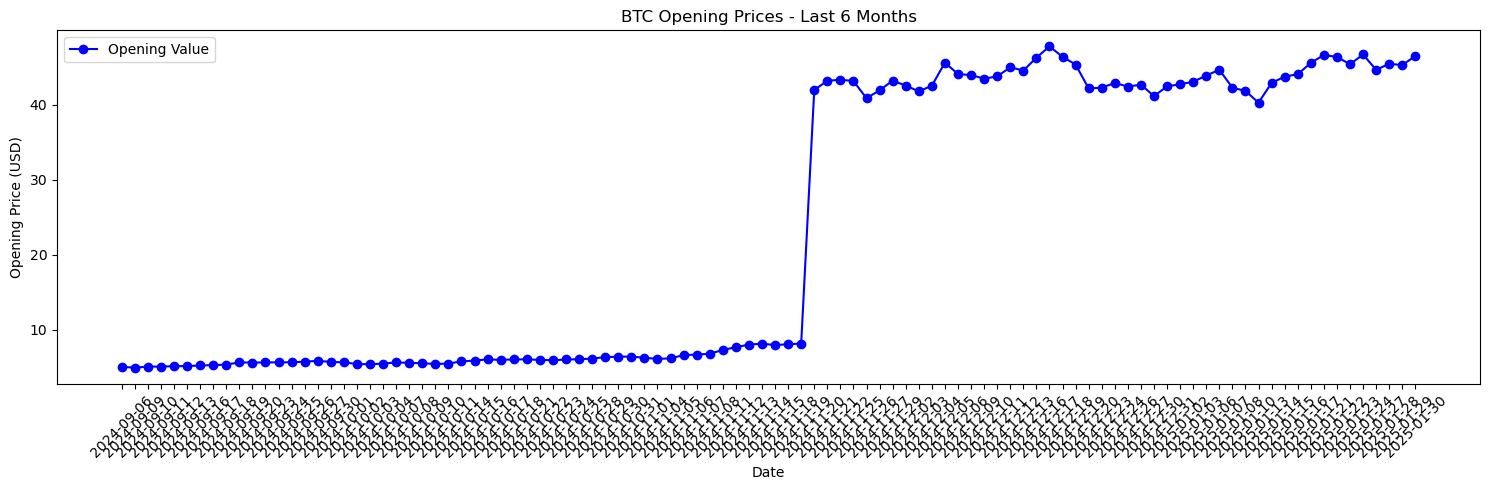

In [52]:
# Plot the line graph
plt.figure(figsize=(15,5))
plt.plot(dates, open_values, marker='o', color='b', label='Opening Value')
plt.title('BTC Opening Prices - Last 6 Months')
plt.xlabel('Date')
plt.ylabel('Opening Price (USD)')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()
plt.tight_layout()

# Show the graph
plt.show()

In [58]:
import pandas as pd
Bitcoin = pd.DataFrame({'date' : dates, 'Opening_value' : open_values})
Bitcoin.info
#Bitcoin.to_csv('OpenValue.CSV', index= False)

<bound method DataFrame.info of           date  Opening_value
0   2024-09-06           5.02
1   2024-09-09           4.91
2   2024-09-10           5.05
3   2024-09-11           5.05
4   2024-09-12           5.11
..         ...            ...
95  2025-01-24          46.71
96  2025-01-27          44.66
97  2025-01-28          45.47
98  2025-01-29          45.29
99  2025-01-30          46.52

[100 rows x 2 columns]>

In [ ]:
## To shift further page numbers
base_url = ## here need to put basic irl of website
page_number = 1
while True :
    url = f"{base_url}catalogue/page-{page_number}.html"
    response = requests.get(url)
    print (page_number, response)
    page_number += 1
    if response.status_code != 200:
        break
    ## here would be rest of scrapping code